# Web Scraping - ImmobielenScour24.at
###  Scraping Rental Apartments informations from Austria - Kufstein
<img src="ImmoScout.png">

In [1]:
#import needed libraries
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
import requests

First define the URL which we are going to use and the pages which we have to loop through

In [2]:
#define the url which we need
url=requests.get("https://www.immobilienscout24.at/regional/tirol/kufstein/wohnung-mieten")
soup = BeautifulSoup(url.content,'html.parser')
#soup.prettify

In [3]:
# I don't know the reason and I tried other solutions but none of them worked. I can get only up to two pages, even thoughh all class names are the same.
# Therefore I hard coded the pages down below, which is not pretty but it does the job for now..
pages = soup.find_all('li', class_="zViKw")
for i in pages:
    print(i.a.get("href"))

/regional/tirol/kufstein/wohnung-mieten
/regional/tirol/kufstein/wohnung-mieten/seite-2


In [4]:
#Hard code the pages because code above did not work as intented
pages=["https://www.immobilienscout24.at/regional/tirol/kufstein/wohnung-mieten",
       "https://www.immobilienscout24.at/regional/tirol/kufstein/wohnung-mieten/seite-2",
       "https://www.immobilienscout24.at/regional/tirol/kufstein/wohnung-mieten/seite-3",
       "https://www.immobilienscout24.at/regional/tirol/kufstein/wohnung-mieten/seite-4",
       "https://www.immobilienscout24.at/regional/tirol/kufstein/wohnung-mieten/seite-5",
       "https://www.immobilienscout24.at/regional/tirol/kufstein/wohnung-mieten/seite-6",]

Loop though all pages and apartment links to scrape the needed infos about the apartments

In [5]:
names=[]
rooms=[]
infos=[]
features=[]
heating_type=[]
description=[]
price=[]

# loop through all pages, in our case 6 pages
for page in pages:
    page_links = page #hard coded page links
    html = requests.get(page_links)
    soup_page = BeautifulSoup(html.content,'html.parser')
    links=soup_page.find_all('li',{"class": "J04SL"}) # get all the apartment links

    #loop through all the apartment links
    for link in links:
        immo_links = "https://www.immobilienscout24.at" + link.a.get("href") #rental apartment links
        immo_page = requests.get(immo_links)
        soup = BeautifulSoup(immo_page.content,'html.parser')
        
        #scrape infos of apartments
        name = soup.find("h1", class_="wi_ND MhP2K t5Xdw").text
        info = soup.find('div', class_="x_Y9W n4wFn LbMEg xsCew").text
        descr= soup.find('div',{"class": "AhB_5 wi_ND X2vjS"}).text
        rent = soup.find('div', class_="mb-8 n4wFn kjqJt Vdufh").text.rsplit('€', 2)[:2]
        
        
        # Some infos were nested so I had to add them like this to not get an error
        roar=[] # (roar = room-area)
        room_area = soup.find_all('span', class_="liRmo wi_ND j5x8k t5Xdw") # This contains num of rooms and apt sqft area (2 columns)
        for i in room_area:
            roar.append(i.text)
        
        feature=[]
        ftr = soup.find_all('div', class_="n5x5v") # This containts 8 columns of diverse infos about the apartment (not all of them are needed)
        for i in ftr:
            feature.append(i.text)

        heating=[]
        heat = soup.find_all('div', class_="wi_ND X2vjS t5Xdw") # This containts infos about the heating type (3 columns)
        for i in heat:
            heating.append(i.text)

            
        # Append all infos to their list (fill the columns with infos(rows))
        names.append(name) 
        rooms.append(roar)
        infos.append(info)
        features.append(feature)
        heating_type.append(heating)
        description.append(descr)
        price.append(rent)

In [6]:
print("Number of Apartments:", len(names))

Number of Apartments: 131


We can see that we have infos about 135 apartments, which are for rent in Kufstein Austria.<br>
(In my first try I had a result of 135 and saved the csv file like this. The next days when I came back to check, the number of apartments changed.)

### Create a Dataframe with the scraped infos

In [23]:
# create the dataframe
df=pd.DataFrame(columns=["names","rooms","infos","features","heating_type","description","price"])

In [24]:
# assign scraped infos to columns
df["names"]=names
df["rooms"]=rooms
df["infos"]=infos
df["features"]=features
df["heating_type"]=heating_type
df["description"]=description
df["price"]=price

Gather basic infos about the Dataframe

In [25]:
df.head()

,names,rooms,infos,features,heating_type,description,price
0,Bezaubernde Wohnung am Kraftplatz Hintersteine...,[136],"Fläche m²136Miete2.150 €15,81 € / m²","[Baujahr 2007Neuwertig, Dielen, Fliesen, Wohnf...",[Fußbodenheizung],Diese einzigartige Wohnung liegt direkt im Nat...,"[2.150 , 15,81 ]"
1,Moderne Terrassenwohnung mit Blick auf den Wil...,"[5, 143]","Zimmer5Fläche m²143Miete2.500 €17,48 € / m²","[Wohnfläche 143 m², 1 TerrasseTerrasse, 5 Zimm...",[],Diese moderne Terrassenwohnung verfügt über in...,"[2.500 , 17,48 ]"
2,"Erstbezug! TOP 11 im Neubauprojekt ""Endach 18""...","[3, 61]","Zimmer3Fläche m²61Miete1.100 €18,1 € / m²","[Verfügbar ab Jänner 2023, Baujahr 2022Erstbez...","[Fußbodenheizung, Heizwärmebedarf, Gesamtenerg...",Im aufstrebenden Stadtteil Endach wurde kürzli...,"[1.100 , 18,1 ]"
3,Tolle Wohnung im Bauernhaus mit eigenen Eingan...,"[2, 90]","Zimmer2Fläche m²90Miete1.050 €11,67 € / m²","[Wohnfläche 90 m², 2 Zimmer]",[],Die Wohnung befindet sich in einem Bauernhaus ...,"[1.050 , 11,67 ]"
4,"Erstbezug! TOP 7 im Neubauprojekt ""Endach 18"":...","[2, 47]","Zimmer2Fläche m²47Miete1.100 €23,18 € / m²","[Verfügbar ab Ende 2022, Baujahr 2022Erstbezug...","[Fußbodenheizung, Heizwärmebedarf, Gesamtenerg...",Im aufstrebenden Stadtteil Endach wurde kürzli...,"[1.100 , 23,18 ]"


In [26]:
df.shape

(131, 7)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   names         131 non-null    object
 1   rooms         131 non-null    object
 2   infos         131 non-null    object
 3   features      131 non-null    object
 4   heating_type  131 non-null    object
 5   description   131 non-null    object
 6   price         131 non-null    object
dtypes: object(7)
memory usage: 7.3+ KB


In [28]:
df.isnull().sum()

names           0
rooms           0
infos           0
features        0
heating_type    0
description     0
price           0
dtype: int64

Since some of the infos we scraped were nested, it created them  as lists, so we can't see the empty values. After trying various mehtods the to_list() method helped me most to list all the values alone and seperate them. Then we combine all to our dataframe with the concat() method

In [30]:
#seperate the infos of each column and list them as new dataframes
df2 = pd.DataFrame(df['rooms'].to_list(), columns=['num_rooms','area'])
df3 = pd.DataFrame(df['features'].to_list(), columns=['feature1','feature2','feature3','feature4','feature5','feature6','feature7','feature8'])
df4 = pd.DataFrame(df['price'].to_list(), columns=['price','price_sqrft'])
df5 = pd.DataFrame(df['heating_type'].to_list(), columns=['heating_type','attr1','attr2'])
#combine them all to our new dataframe with all infos
df  = pd.concat([df['names'],df['description'],df2,df3,df4,df5], ignore_index=True, axis = 1)

In [31]:
df.shape

(131, 17)

In [32]:
df.columns=['title','description','num_rooms','area','availability','build_year','del1','del2','del3','parking','del4','elevator','price','sqft_price','heating_type','del5','del6']
df.drop(['del1', 'del2', 'del3', 'del4', 'del5', 'del6'], axis=1, inplace=True)
df.shape

(131, 11)

In [33]:
df.head()

,title,description,num_rooms,area,availability,build_year,parking,elevator,price,sqft_price,heating_type
0,Bezaubernde Wohnung am Kraftplatz Hintersteine...,Diese einzigartige Wohnung liegt direkt im Nat...,136,None,"Baujahr 2007Neuwertig, Dielen, Fliesen",Wohnfläche 136 m²,"Einbauküche, Badewanne, Dusche, Kamin",None,2.150,"15,81",Fußbodenheizung
1,Moderne Terrassenwohnung mit Blick auf den Wil...,Diese moderne Terrassenwohnung verfügt über in...,5,143,Wohnfläche 143 m²,1 TerrasseTerrasse,None,None,2.500,"17,48",None
2,"Erstbezug! TOP 11 im Neubauprojekt ""Endach 18""...",Im aufstrebenden Stadtteil Endach wurde kürzli...,3,61,Verfügbar ab Jänner 2023,"Baujahr 2022Erstbezug, Massivbauweise, Unterke...","Fahrradabstellraum1 Garage, 1 Parkmöglichkeit","Barrierefrei, Personenaufzug",1.100,"18,1",Fußbodenheizung
3,Tolle Wohnung im Bauernhaus mit eigenen Eingan...,Die Wohnung befindet sich in einem Bauernhaus ...,2,90,Wohnfläche 90 m²,2 Zimmer,None,None,1.050,"11,67",None
4,"Erstbezug! TOP 7 im Neubauprojekt ""Endach 18"":...",Im aufstrebenden Stadtteil Endach wurde kürzli...,2,47,Verfügbar ab Ende 2022,"Baujahr 2022Erstbezug, Massivbauweise, Unterke...",1 Garage1 Parkmöglichkeit,"Barrierefrei, Personenaufzug",1.100,"23,18",Fußbodenheizung


In [34]:
# The second apartment had a displacement of area and number of rooms, so we change that here
df['area'][0]=136
df['num_rooms'][0]=2
#When reading the csv in the other file, the price were only 2.50, 2.15, therefor i replaced the dots with empty
df['price']=df['price'].str.replace('.','')

C:\Users\Kemal\AppData\Local\Temp\ipykernel_12920\2987760724.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price']=df['price'].str.replace('.','')


Save our Dataframe to a csv File to peform Regression model

In [18]:
#df.to_csv("immoscout_regression.csv")

In [35]:
df3.head(10)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8
0,"Baujahr 2007Neuwertig, Dielen, Fliesen",Wohnfläche 136 m²,1 Balkonsüdostseitig,"2 Schlafzimmer1 Badezimmer, 1 Toilette, Gäste WC","2 Parkplätze1 Garage, 3 Parkmöglichkeiten","Einbauküche, Badewanne, Dusche, Kamin",None,None
1,Wohnfläche 143 m²,1 TerrasseTerrasse,"5 Zimmer3 Schlafzimmer, 2 Badezimmer, 1 Toilette",None,None,None,None,None
2,Verfügbar ab Jänner 2023,"Baujahr 2022Erstbezug, Massivbauweise, Unterke...","Wohnfläche 60,76 m²",1 Balkonwestseitig,"3 ZimmerKellerfläche 4 m², 2 Schlafzimmer, 1 B...","Fahrradabstellraum1 Garage, 1 Parkmöglichkeit","Einbauküche, Teilmöbliert","Barrierefrei, Personenaufzug"
3,Wohnfläche 90 m²,2 Zimmer,None,None,None,None,None,None
4,Verfügbar ab Ende 2022,"Baujahr 2022Erstbezug, Massivbauweise, Unterke...","Wohnfläche 47,45 m²Gartenfläche 45 m²","1 Terrassewestseitig, Garten, Terrasse","2 ZimmerKellerfläche 3,25 m², 1 Schlafzimmer, ...",1 Garage1 Parkmöglichkeit,"Einbauküche, Teilmöbliert, Gartennutzung","Barrierefrei, Personenaufzug"
5,Verfügbar ab Ende 2022,"Baujahr 2022Erstbezug, Massivbauweise, Unterke...","Wohnfläche 56,48 m²Gartenfläche 8 m²","1 Balkonwestseitig, Garten","2 ZimmerKellerfläche 2,84 m², 1 Schlafzimmer, ...",1 Garage1 Parkmöglichkeit,"Einbauküche, Teilmöbliert, Gartennutzung","Barrierefrei, Personenaufzug"
6,Verfügbar ab ab sofort,Parkett,Wohnfläche 130 m²Gesamtfläche 130 m²,1 Balkon,"4 Zimmer1 Badezimmer, 1 Toilette, WG-tauglich",Carport2 Parkmöglichkeiten,"Einbauküche, Teilmöbliert, Badewanne, Dusche, ...",None
7,Verfügbar ab sofort,"Baujahr 2009Neubau, Neuwertig, Unterkellert, P...",Gesamtfläche 88 m²,1 Balkon 10 m²,"4 Zimmer3 Schlafzimmer, 1 Badezimmer",Tiefgarage2 Parkmöglichkeiten,"Einbauküche, Badewanne",None
8,Verfügbar ab 01.02.2023,"Baujahr 1956Altbau, Gepflegt",Wohnfläche 57 m²,Garten,"3 Zimmer2 Schlafzimmer, 1 Badezimmer","Garage1 Garage, 1 Parkmöglichkeit","Einbauküche, Gartennutzung",None
9,Verfügbar ab ab 01.02.2023,Baujahr 2022,Wohnfläche 117 m²,1 Terrasse 19 m²,"2 ZimmerKellerfläche 5,5 m², 1 Schlafzimmer, 1...",1 Tiefgaragenplätze1 Parkmöglichkeit,None,None


## Using WordCloud to see mostly occuring words in the description

In [36]:
# Text processing
df["description"]=df["description"].str.lower() # change to lower case
df["description"]=df["description"].str.replace('[^\w\s]','') # get rid of punctuation
df["description"]=df["description"].str.replace('\d+','') # get rid of digits
df["description"]=df["description"].str.replace('\n',' ').replace('\r',' ') # get rid of enter and returns

C:\Users\Kemal\AppData\Local\Temp\ipykernel_12920\64252763.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace('[^\w\s]','') # get rid of punctuation
C:\Users\Kemal\AppData\Local\Temp\ipykernel_12920\64252763.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df["description"]=df["description"].str.replace('\d+','') # get rid of digits


In [38]:
df['description'][0]

'diese einzigartige wohnung liegt direkt im naturschutzgebiet hintersteiner seescheffau am fuße des wilden kaisers regelmäßig ist der see unter den schönsten gewählten plätzen österreichs vertreten am seeufer befindet sich ein im jahre  neu errichtete bauernhof mit der angebotenen dachgeschosswohnung die langfristig zu mietende wohnung in dieser einzigartigen umgebung bietet absolute ruhe und die chance dem alltag zu entfliehendas bauernhaus wurde unter strengen naturschutzrichtlinien errichtet und verfügt ausschließlich über biologische und gesunde baustoffe wie tonziegel holzblockwände bienenwachsanstrich und fassadenwärmedämmung aus korkauf den  m² wohnfläche befinden sich zwei schlafzimmer ein großzügiges badezimmer ein schöner wohnessbereich sowie ein separates wc und ein großer balkon zudem gehören zur wohnung ein  m² großer kellerraum und ein garagenabstellplatzein hauptwohnsitz muss am objekt angemeldet werdenverpassen sie nicht diese einzigartige mietgelegenheit in absoluter a

In [44]:
#pip install stop_words

In [45]:
from stop_words import get_stop_words
stop_words = get_stop_words('german')

In [46]:
stop_words

['aber',
 'alle',
 'allem',
 'allen',
 'aller',
 'alles',
 'als',
 'also',
 'am',
 'an',
 'ander',
 'andere',
 'anderem',
 'anderen',
 'anderer',
 'anderes',
 'anderm',
 'andern',
 'anders',
 'auch',
 'auf',
 'aus',
 'bei',
 'bin',
 'bis',
 'bist',
 'da',
 'damit',
 'dann',
 'das',
 'dass',
 'dasselbe',
 'dazu',
 'daß',
 'dein',
 'deine',
 'deinem',
 'deinen',
 'deiner',
 'deines',
 'dem',
 'demselben',
 'den',
 'denn',
 'denselben',
 'der',
 'derer',
 'derselbe',
 'derselben',
 'des',
 'desselben',
 'dessen',
 'dich',
 'die',
 'dies',
 'diese',
 'dieselbe',
 'dieselben',
 'diesem',
 'diesen',
 'dieser',
 'dieses',
 'dir',
 'doch',
 'dort',
 'du',
 'durch',
 'ein',
 'eine',
 'einem',
 'einen',
 'einer',
 'eines',
 'einig',
 'einige',
 'einigem',
 'einigen',
 'einiger',
 'einiges',
 'einmal',
 'er',
 'es',
 'etwas',
 'euch',
 'euer',
 'eure',
 'eurem',
 'euren',
 'eurer',
 'eures',
 'für',
 'gegen',
 'gewesen',
 'hab',
 'habe',
 'haben',
 'hat',
 'hatte',
 'hatten',
 'hier',
 'hin',
 'h

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def wc(data,bgcolor):
    from PIL import Image
    mask = np.array(Image.open("cloud.png"))
    wc=WordCloud(background_color=bgcolor, width=800, height=400,mask=mask,max_words=100, stopwords=stop_words).generate(' '.join(data))
    plt.figure(figsize=(20,10))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

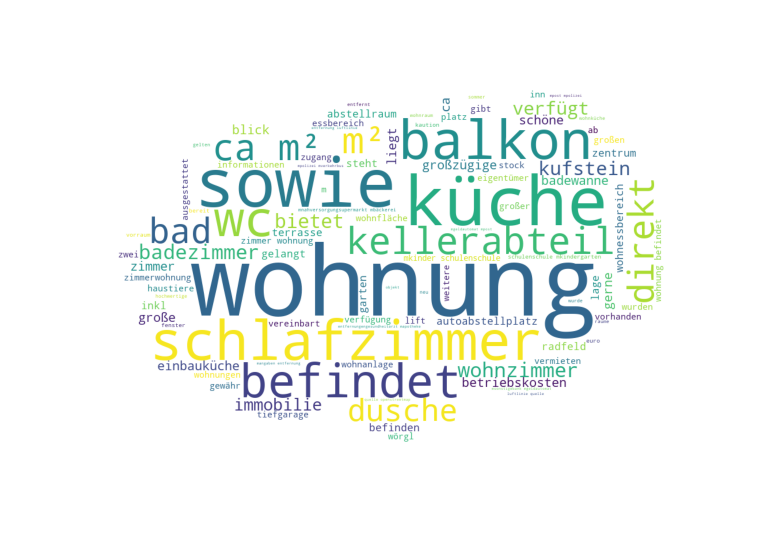

In [52]:
wc(df.description,'white')

* wohnung = apartment
* küche = kitchen
* kellerabteil = basement compartment
* schlafzimmer = bedroom